<a href="https://colab.research.google.com/github/Adiatmaja/kedaireka/blob/main/kedairekaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membaca File CSV

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("Data_Klaten_HST0.csv")

In [19]:
data = df.drop(columns=['No', 'Kode'])

data = pd.get_dummies(data)
data

,Carbon Total,Indeks_BI,Indeks_NDVI
0,39.3739,169.3330,0.0198
1,35.6145,182.3129,0.0352
2,34.7548,182.1117,0.0114
3,36.5848,169.6821,0.0315
4,41.6800,167.2533,0.0319
5,38.7875,166.8452,0.0145
6,38.9714,174.4907,0.0084
7,39.9606,166.0964,0.0138
8,39.2068,179.4306,0.0143
9,38.5028,179.9491,0.0029


# Membuat Variabel Prediksi

In [20]:
predictions = ['Indeks_BI', 'Indeks_NDVI']

X = data[predictions]
y = data['Carbon Total']

# Visualisasi Data

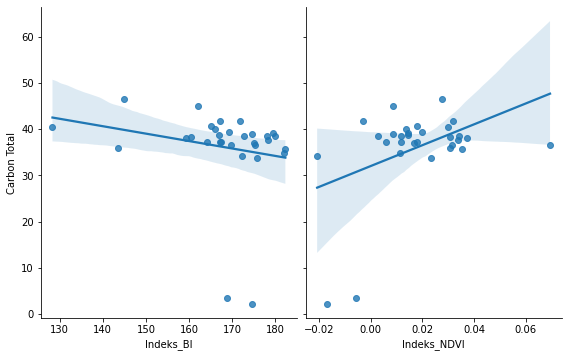

In [21]:
import seaborn as sns

sns.pairplot(data, x_vars=["Indeks_BI", "Indeks_NDVI"], y_vars=["Carbon Total"],height=5, aspect=.8, kind="reg")

# Scaling Data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Indeks_BI,Indeks_NDVI
0,0.107121,0.093651
1,1.218343,0.971276
2,1.201118,-0.385053
3,0.137008,0.760418
4,-0.070924,0.783214


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=0)

# Linear Regression

In [24]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(X_train.values, y_train)

LinearRegression()

In [25]:
linreg.score(X_test.values, y_test)

0.16309449030079182

In [26]:
print(linreg.predict([[169.3330,	0.0198]])) # 1

[-327.0762212]


# Ridge Regression

In [27]:
ridge = linear_model.Ridge()
ridge.fit(X_train.values, y_train)

Ridge()

In [28]:
ridge.score(X_test.values, y_test)

0.16496264608701638

In [29]:
print(ridge.predict([[169.3330,	0.0198]])) # 1

[-290.61027007]


# Lasso Regression

In [30]:
lasso = linear_model.Lasso()
lasso.fit(X_train.values, y_train)

Lasso()

In [31]:
lasso.score(X_test.values, y_test)

0.07494864396232759

In [32]:
print(lasso.predict([[169.3330,	0.0198]])) # 1

[36.93936229]


# JST

In [33]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[None, 1]), keras.layers.Dense(units=1)])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 540ms/step - loss: 1428.6520
Epoch 2/20
1/1 [==============================] - 0s 7ms/step - loss: 1354.0188
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 1252.2155
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 1071.4846
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 734.4592
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 288.7012
Epoch 7/20
1/1 [==============================] - 0s 23ms/step - loss: 93.8750
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 74.3530
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 66.9536
Epoch 10/20
1/1 [==============================] - 0s 7ms/step - loss: 64.2417
Epoch 11/20
1/1 [==============================] - 0s 12ms/step - loss: 63.2716
Epoch 12/20
1/1 [==============================] - 0s 7ms/step - loss: 62.9312
Epoch 13/20
1/1 [=============================